In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("7.csv")

# View the first few rows
print(df.head())

# Summary info
print(df.info())

# Check for missing values
print(df.isnull().sum())


              species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB
None
species      0
length       0
weight       0
w_l_ratio    0
dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder object
le = LabelEncoder()

# Encode species column
df["species_encoded"] = le.fit_transform(df["species"])

# To check the unique encoded labels
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Anabas testudineus': np.int64(0), 'Coilia dussumieri': np.int64(1), 'Otolithoides biauritus': np.int64(2), 'Otolithoides pama': np.int64(3), 'Pethia conchonius': np.int64(4), 'Polynemus paradiseus': np.int64(5), 'Puntius lateristriga': np.int64(6), 'Setipinna taty': np.int64(7), 'Sillaginopsis panijus': np.int64(8)}


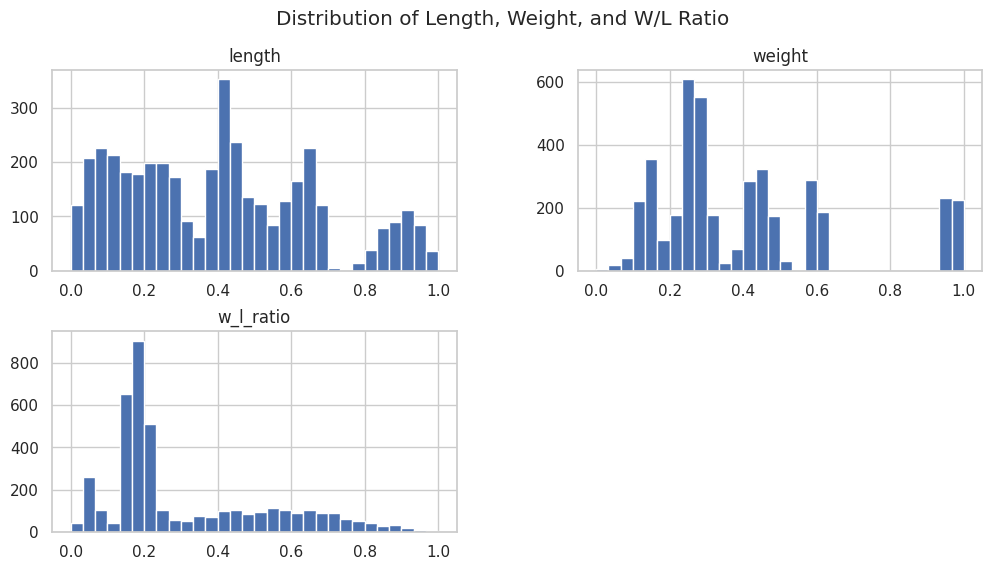

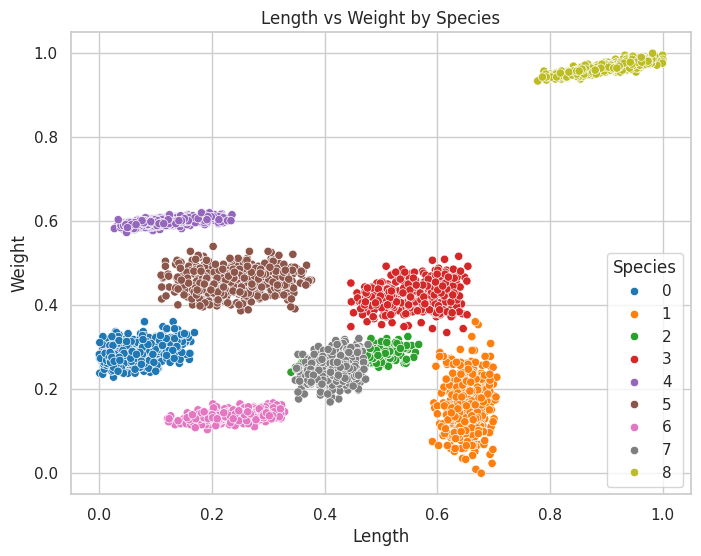

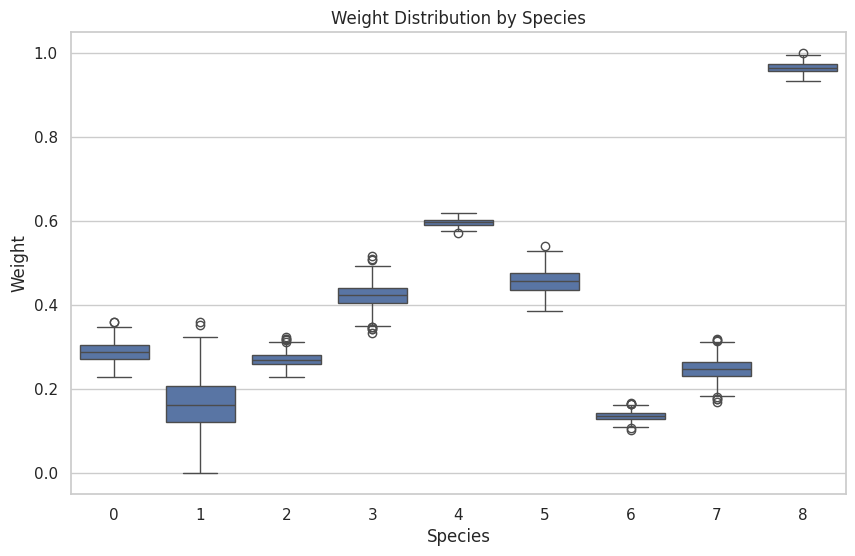

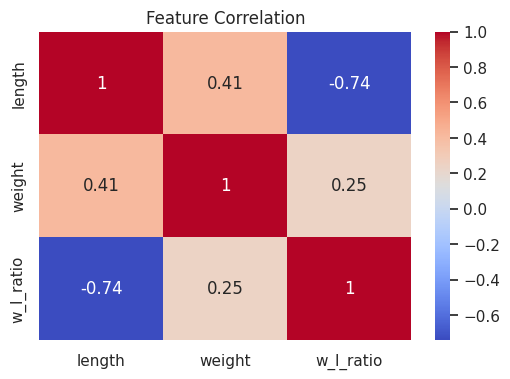

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histogram of Length, Weight, and W/L ratio
df[["length", "weight", "w_l_ratio"]].hist(bins=30, figsize=(12, 6))
plt.suptitle("Distribution of Length, Weight, and W/L Ratio")
plt.show()

# Scatter plot: Length vs Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="length", y="weight", hue="species_encoded", palette="tab10")
plt.title("Length vs Weight by Species")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.legend(title="Species")
plt.show()

# Boxplot for Weight by Species
plt.figure(figsize=(10, 6))
sns.boxplot(x="species_encoded", y="weight", data=df)
plt.title("Weight Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Weight")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[["length", "weight", "w_l_ratio"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [34]:


scaler = MinMaxScaler()
df[['length', 'weight', 'w_l_ratio']] = scaler.fit_transform(data[['length', 'weight', 'w_l_ratio']])


In [35]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[["length", "weight", "w_l_ratio"]]
y = df["species_encoded"]

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)



Train size: (3264, 3)
Test size: (816, 3)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9313725490196079
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.68      0.73      0.70        91
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        65
           7       0.73      0.69      0.71       100
           8       1.00      1.00      1.00        86

    accuracy                           0.93       816
   macro avg       0.93      0.94      0.93       816
weighted avg       0.93      0.93      0.93       816

Confusion Matrix:
 [[120   0   0   0   0   0   0   0   0]
 [  0  77   0   0   0   0   0   0   0]
 [  0   0  66   0   0   0   0  25   0]
 [  0   0   0  86   0   0   0   0   0]
 [  0   0   0   0  89   0   0   0   0]
 [  0   0   0   0   0 102   

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.9362745098039216
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.71      0.74      0.72        91
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        65
           7       0.75      0.72      0.73       100
           8       1.00      1.00      1.00        86

    accuracy                           0.94       816
   macro avg       0.94      0.94      0.94       816
weighted avg       0.94      0.94      0.94       816

Confusion Matrix:
 [[120   0   0   0   0   0   0   0   0]
 [  0  77   0   0   0   0   0   0   0]
 [  0   0  67   0   0   0   0  24   0]
 [  0   0   0  86   0   0   0   0   0]
 [  0   0   0   0  89   0   0   0   0]
 [  0   0   0   0   0 102   

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can try different k values too
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.9301470588235294
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.67      0.73      0.70        91
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        65
           7       0.73      0.68      0.70       100
           8       1.00      1.00      1.00        86

    accuracy                           0.93       816
   macro avg       0.93      0.93      0.93       816
weighted avg       0.93      0.93      0.93       816

Confusion Matrix:
 [[120   0   0   0   0   0   0   0   0]
 [  0  77   0   0   0   0   0   0   0]
 [  0   0  66   0   0   0   0  25   0]
 [  0   0   0  86   0   0   0   0   0]
 [  0   0   0   0  89   0   0   0   0]
 [  0   0   0   0   0 10

In [7]:
from sklearn.svm import SVC

# SVM Model
svm_model = SVC()  # You can add kernel='linear' or 'rbf' to experiment
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.875
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       1.00      0.99      0.99        77
           2       0.60      0.33      0.43        91
           3       0.94      0.92      0.93        86
           4       0.93      0.92      0.93        89
           5       0.92      0.89      0.91       102
           6       0.98      1.00      0.99        65
           7       0.59      0.87      0.70       100
           8       1.00      1.00      1.00        86

    accuracy                           0.88       816
   macro avg       0.88      0.88      0.87       816
weighted avg       0.88      0.88      0.87       816

Confusion Matrix:
 [[118   0   0   0   0   1   1   0   0]
 [  0  76   0   1   0   0   0   0   0]
 [  0   0  30   4   0   0   0  57   0]
 [  0   0   7  79   0   0   0   0   0]
 [  0   0   0   0  82   7   0   0   0]
 [  2   0   0   0   6  91   0   3   0

In [8]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       120
           1       1.00      1.00      1.00        77
           2       0.69      0.53      0.60        91
           3       0.99      1.00      0.99        86
           4       0.99      1.00      0.99        89
           5       1.00      0.97      0.99       102
           6       1.00      1.00      1.00        65
           7       0.65      0.78      0.71       100
           8       1.00      1.00      1.00        86

    accuracy                           0.92       816
   macro avg       0.92      0.92      0.92       816
weighted avg       0.92      0.92      0.92       816

Confusion Matrix:
 [[120   0   0   0   0   0   0   0   0]
 [  0  77   0   0   0   0   0   0   0]
 [  0   0  48   1   0   0   0  42   0]
 [  0   0   0  86   0   0   0   0   0]
 [  0   0   0   0  89   0   0   0   0]
 [  2   

/home/munny_1129/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9252450980392157
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.65      0.70      0.68        91
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        65
           7       0.71      0.66      0.68       100
           8       1.00      1.00      1.00        86

    accuracy                           0.93       816
   macro avg       0.93      0.93      0.93       816
weighted avg       0.93      0.93      0.93       816

Confusion Matrix:
 [[120   0   0   0   0   0   0   0   0]
 [  0  77   0   0   0   0   0   0   0]
 [  0   0  64   0   0   0   0  27   0]
 [  0   0   0  86   0   0   0   0   0]
 [  0   0   0   0  89   0   0   0   0]
 [  0   0   0 

In [10]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.928921568627451
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.71      0.60      0.65        91
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        65
           7       0.68      0.78      0.73       100
           8       1.00      1.00      1.00        86

    accuracy                           0.93       816
   macro avg       0.93      0.93      0.93       816
weighted avg       0.93      0.93      0.93       816

Confusion Matrix:
 [[120   0   0   0   0   0   0   0   0]
 [  0  77   0   0   0   0   0   0   0]
 [  0   0  55   0   0   0   0  36   0]
 [  0   0   0  86   0   0   0   0   0]
 [  0   0   0   0  89   0   0   0   0]
 [  0   0   0   0

In [13]:
from sklearn.neural_network import MLPClassifier

# Neural Network Model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predict
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate
print("Neural Network (MLP) Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))


Neural Network (MLP) Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.76      0.37      0.50        91
           3       1.00      0.99      0.99        86
           4       1.00      1.00      1.00        89
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00        65
           7       0.61      0.90      0.73       100
           8       1.00      1.00      1.00        86

    accuracy                           0.92       816
   macro avg       0.93      0.92      0.91       816
weighted avg       0.93      0.92      0.91       816

Confusion Matrix:
 [[120   0   0   0   0   0   0   0   0]
 [  0  77   0   0   0   0   0   0   0]
 [  0   0  34   0   0   0   0  57   0]
 [  0   0   1  85   0   0   0   0   0]
 [  0   0   0   0  89   0   0   0   0]
 [  0  

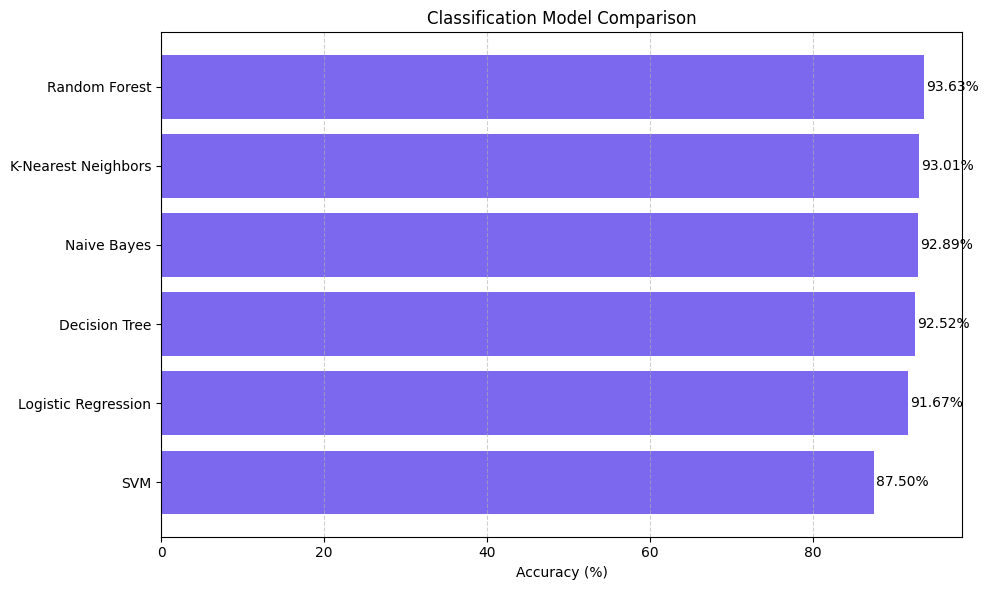

In [11]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = [
    "Random Forest", 
    "K-Nearest Neighbors", 
    "Naive Bayes", 
    "Decision Tree", 
    "Logistic Regression", 
    "SVM"
]
accuracies = [93.63, 93.01, 92.89, 92.52, 91.67, 87.50]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color='mediumslateblue')
plt.xlabel('Accuracy (%)')
plt.title('Classification Model Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Best at the top

# Adding accuracy labels on the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, f"{acc:.2f}%", va='center')

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

# Load your dataset
data = pd.read_csv("7.csv")

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Now calculate correlation
print(numeric_data.corr())


             length    weight  w_l_ratio
length     1.000000  0.411584  -0.738174
weight     0.411584  1.000000   0.245835
w_l_ratio -0.738174  0.245835   1.000000


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target for regression
X_reg = data[['length', 'w_l_ratio']]
y_reg = data['weight']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Model
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# Predict
y_pred_reg = reg_model.predict(X_test_reg)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("Regression RMSE:", rmse)
print("R² Score:", r2)


Regression RMSE: 0.42598419333131415
R² Score: 0.821926204151447


In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Use same features and target
X_poly = data[['length', 'w_l_ratio']]
y_poly = data['weight']

# Split
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)

# Polynomial regression pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_poly, y_train_poly)

# Predict
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
r2_poly = r2_score(y_test_poly, y_pred_poly)

print("Polynomial Regression RMSE:", rmse_poly)
print("R² Score:", r2_poly)


Polynomial Regression RMSE: 1.5401757945667074e-15
R² Score: 1.0


In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Prepare data
X_nn = data[['length', 'w_l_ratio']]
y_nn = data['weight']

# Train-test split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_nn)
X_test_scaled = scaler.transform(X_test_nn)

# Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train_nn)

# Predict
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluation
rmse_nn = np.sqrt(mean_squared_error(y_test_nn, y_pred_nn))
r2_nn = r2_score(y_test_nn, y_pred_nn)

print("Neural Network Regression RMSE:", rmse_nn)
print("R² Score:", r2_nn)


Neural Network Regression RMSE: 0.0422576777033814
R² Score: 0.9982476360893326


<Figure size 1000x600 with 0 Axes>

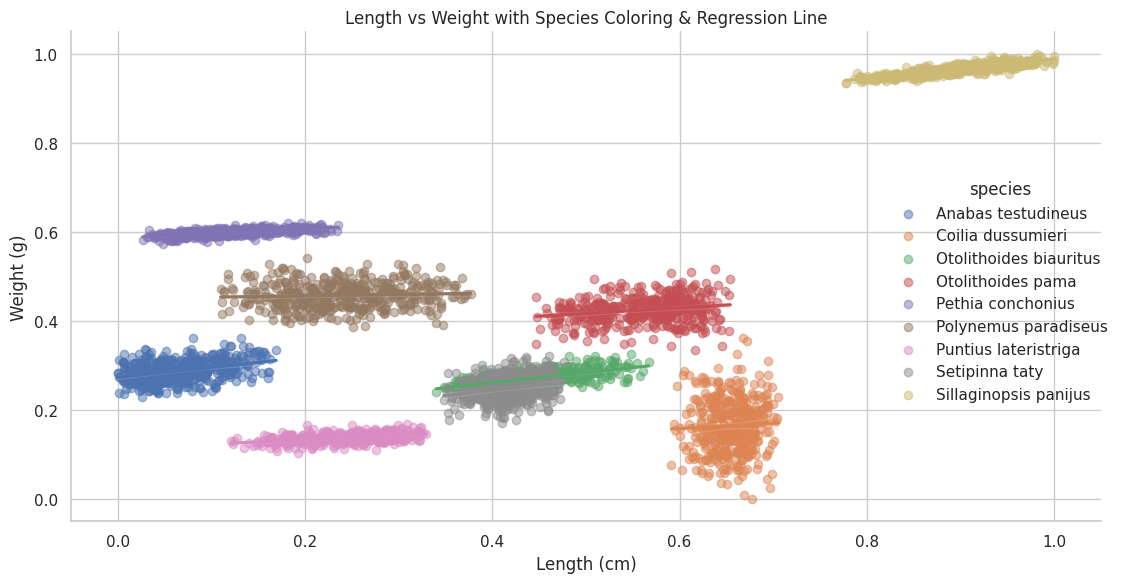

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line (length vs weight)
plt.figure(figsize=(10,6))
sns.lmplot(data=df, x='length', y='weight', hue='species', height=6, aspect=1.5, markers='o', scatter_kws={'alpha':0.5})
plt.title("Length vs Weight with Species Coloring & Regression Line")
plt.xlabel("Length (cm)")
plt.ylabel("Weight (g)")
plt.tight_layout()
plt.show()


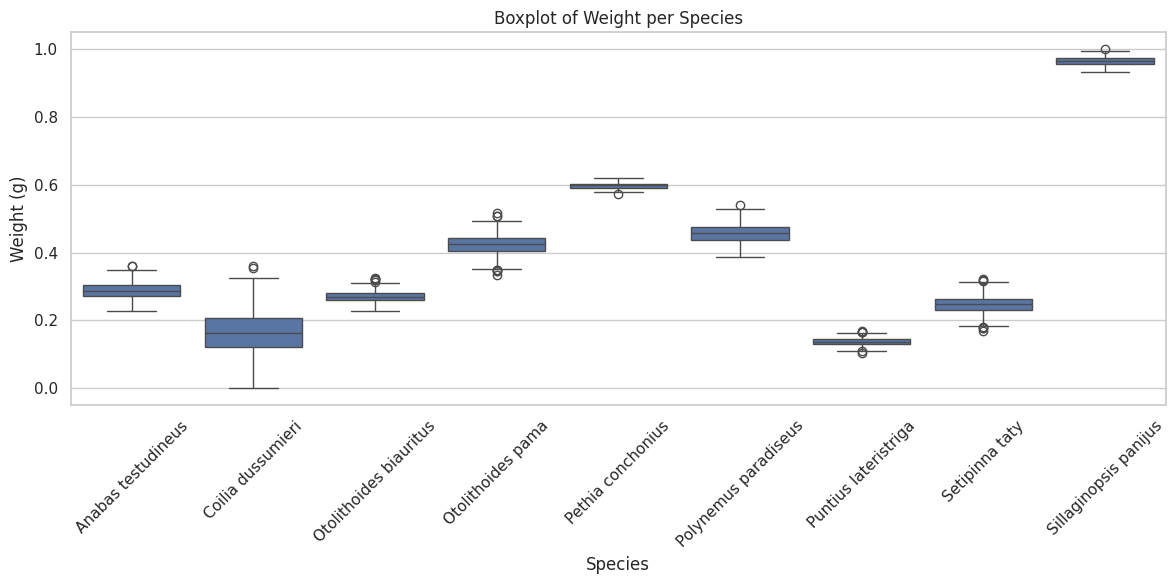

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='species', y='weight')
plt.xticks(rotation=45)
plt.title("Boxplot of Weight per Species")
plt.xlabel("Species")
plt.ylabel("Weight (g)")
plt.tight_layout()
plt.show()


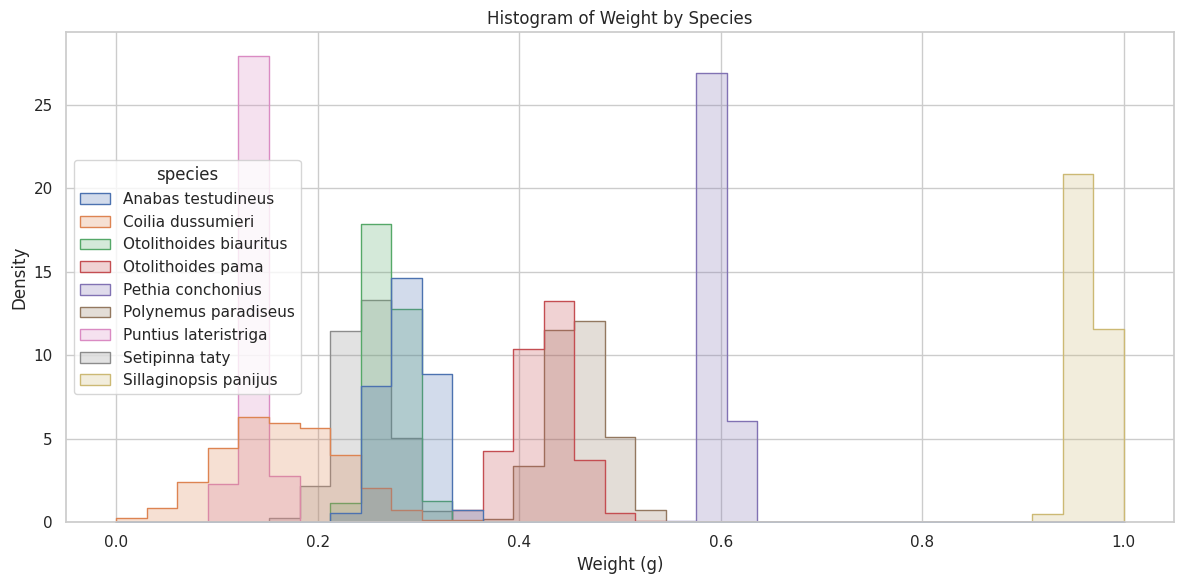

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='weight', hue='species', element='step', stat='density', common_norm=False)
plt.title("Histogram of Weight by Species")
plt.xlabel("Weight (g)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()
